In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

/Users/toast/anaconda2/lib/python2.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


# Dimensionality reduction - PCA


In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


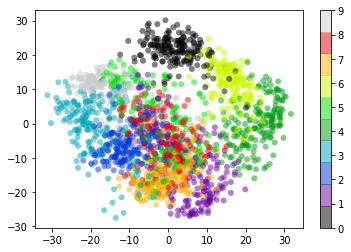

In [7]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

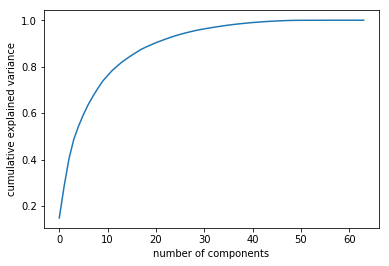

In [8]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

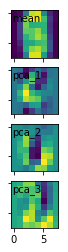

In [16]:
pca_comp = np.vstack([X.mean(0), pca.components_])
titles = ['mean', 'pca_1', 'pca_2', 'pca_3']
fig = plt.figure(figsize=(5, 4))
for i, label in enumerate(titles):
    ax = fig.add_subplot(len(titles), 1, i + 1)
    ax.imshow(pca_comp[i].reshape(8,8))
    ax.text(0.03, 0.94, label, transform=ax.transAxes, ha='left', va='top')
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    if i < len(titles) - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())

# Exercise 3
Try *sklearn.manifold.TSNE* instead of PCA

In [9]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [11]:
X_2d = tsne.fit_transform(X)

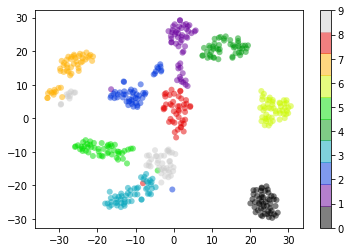

In [12]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

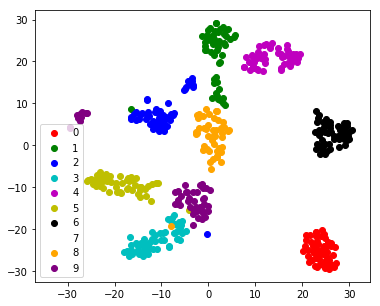

In [13]:
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()